# Introduction to Neural Network Regression with Tensorflow

There are many definitions for a regression problem but in our case we are going to simplify it: predicting numerical variable based on some othere combination of variables.

In [1]:
%load_ext tensorboard

In [2]:
import tensorflow as tf
tf.__version__

2021-10-25 17:29:19.682964: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-10-25 17:29:19.682978: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


'2.6.0'

In [3]:
print("Tensorflow GPU support:", tf.test.is_built_with_gpu_support())
print("GPU device(s):", tf.config.list_physical_devices("GPU"))

Tensorflow GPU support: True
GPU device(s): []


2021-10-25 17:29:20.446828: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-25 17:29:20.447095: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-10-25 17:29:20.447132: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2021-10-25 17:29:20.447164: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2021-10-25 17:29:20.447196: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

## Creating data to view and fit

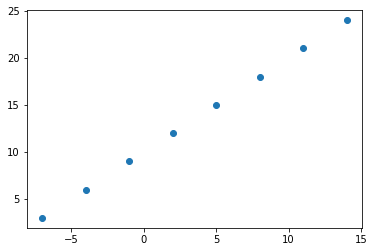

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y)

## Input and Ouput Shapes

In [5]:
# Create a demo tensor for housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])

house_info, house_price

2021-10-25 17:29:20.722018: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [6]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [7]:
# Turn our np arrays into tensors
X = tf.constant(tf.cast(X, dtype=tf.float32))
y = tf.constant(tf.cast(y, dtype=tf.float32))
X.shape, y.shape

(TensorShape([8]), TensorShape([8]))

## Steps in modeling with Tensorflow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model
2. **Compile a model** - define the loss function - the function wich tells our model how wrong it is - and the optimizer, as well as evaluation metrics
3. **Fitting a model** - letting a model try to find patterns between X and y (features and labels)

In [8]:
tf.random.set_seed(42)

# 1. Create a model using sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(
    loss=tf.keras.losses.mae, # mae = mean absolute error
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

# 3. fit the model
model.fit(X, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 157ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 2ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 2ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 1ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 2ms/step - loss: 10.9748 - mae: 10.9748


2021-10-25 17:29:21.063997: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


In [9]:
# Try to make a prediction with this model
y_pred = model.predict([17.0])
y_pred

array([[12.716021]], dtype=float32)

## Improving the model

Because right now it sucks

In [10]:
# 1. Create a model using sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(
    loss=tf.keras.losses.mae, # mae = mean absolute error
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["mae"]
)

# 3. fit the model
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 192ms/step - loss: 14.6466 - mae: 14.6466
Epoch 2/100
1/1 [==============================] - 0s 1ms/step - loss: 13.9532 - mae: 13.9532
Epoch 3/100
1/1 [==============================] - 0s 1ms/step - loss: 13.2603 - mae: 13.2603
Epoch 4/100
1/1 [==============================] - 0s 1ms/step - loss: 12.5659 - mae: 12.5659
Epoch 5/100
1/1 [==============================] - 0s 1ms/step - loss: 11.8675 - mae: 11.8675
Epoch 6/100
1/1 [==============================] - 0s 1ms/step - loss: 11.1621 - mae: 11.1621
Epoch 7/100
1/1 [==============================] - 0s 1ms/step - loss: 10.4475 - mae: 10.4475
Epoch 8/100
1/1 [==============================] - 0s 1ms/step - loss: 9.7214 - mae: 9.7214
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 8.9817 - mae: 8.9817
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 8.2262 - mae: 8.2262
Epoch 11/100
1/1 [==============================] - 0s 1ms/step

In [11]:
# Try to make a prediction with this model
y_pred = model.predict([17.0])
y_pred

array([[26.434414]], dtype=float32)

## Evaluating a model


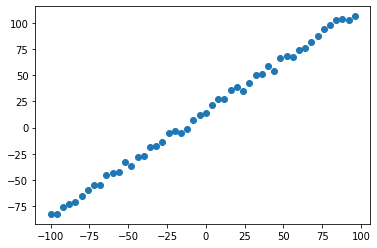

In [12]:
X = tf.range(-100, 100, 4, dtype=tf.float32)

y = X + 10.0
y = y + tf.random.uniform(y.shape, 0, 10, dtype=tf.float32)
plt.scatter(X, y)

## The three sets

* **Training set**: The data to train the model
* **Validation set**: The data to tune the model
* **Test set**: The data to evaluate the model

Proportions are usually 70% - 15% - 15% (or 70/30 if you skip the validation set)

In [13]:
# Split the data into train and test sets
X_train = X[:40] # first 40 samples
y_train = y[:40]

X_test = X[40:] # last 10 samples
y_test = y[40:]

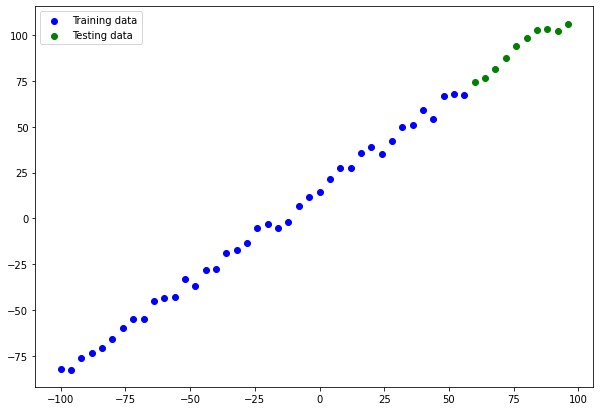

In [14]:
# Visualize train data
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, c="b", label="Training data")
plt.scatter(X_test, y_test, c="g", label="Testing data")
plt.legend();

In [15]:
# Build a neural network to model the data
# import datetime
tf.random.set_seed(42)

# 1. Create a model using sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1, name="output_layer")
], name="linear_regression_model")

# 2. Compile the model
model.compile(
    loss=tf.keras.losses.mae, # mae = mean absolute error
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["mae"]
)

# log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
# tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# # 3. fit the model
model.fit(X_train, y_train, epochs=500, callbacks=[])

Epoch 1/500
2/2 [==============================] - 0s 3ms/step - loss: 34.8440 - mae: 34.8440
Epoch 2/500
2/2 [==============================] - 0s 1ms/step - loss: 32.7788 - mae: 32.7788
Epoch 3/500
2/2 [==============================] - 0s 2ms/step - loss: 30.8798 - mae: 30.8798
Epoch 4/500
2/2 [==============================] - 0s 1ms/step - loss: 28.9808 - mae: 28.9808
Epoch 5/500
2/2 [==============================] - 0s 1ms/step - loss: 27.0953 - mae: 27.0953
Epoch 6/500
2/2 [==============================] - 0s 2ms/step - loss: 25.2352 - mae: 25.2352
Epoch 7/500
2/2 [==============================] - 0s 1ms/step - loss: 23.3742 - mae: 23.3742
Epoch 8/500
2/2 [==============================] - 0s 1ms/step - loss: 21.4170 - mae: 21.4170
Epoch 9/500
2/2 [==============================] - 0s 1ms/step - loss: 19.6187 - mae: 19.6187
Epoch 10/500
2/2 [==============================] - 0s 1ms/step - loss: 18.0002 - mae: 18.0002
Epoch 11/500
2/2 [==============================] - 0s 2ms/

## Visualizing the model

In [16]:
model.summary()

Model: "linear_regression_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               200       
_________________________________________________________________
output_layer (Dense)         (None, 1)                 101       
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model
* Trainable params - these are the parameters (patterns) the model can update as it trains
* Non trainable params - parameters that are not updated during training (typical when bringin in already learn patterns ot parameters from other models during **transfer learning**)

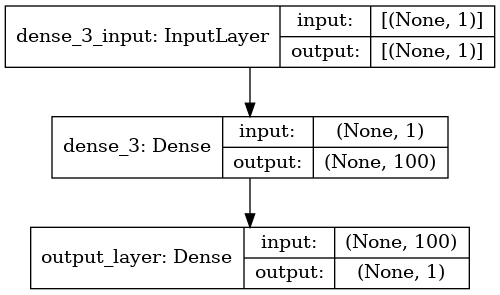

In [17]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

## Visualizing model predictions

In [18]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

array([[ 76.05181 ],
       [ 80.09511 ],
       [ 84.138405],
       [ 88.18171 ],
       [ 92.225   ],
       [ 96.2683  ],
       [100.31161 ],
       [104.3549  ],
       [108.39819 ],
       [112.4415  ]], dtype=float32)

In [19]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
    """
    Plots training, test and predictions
    """
    plt.figure(figsize=(10, 7))
    plt.scatter(train_data, train_labels, c="b", label="Training data")
    plt.scatter(test_data, test_labels, c="g", label="Testing data")
    plt.scatter(test_data, predictions, c="r", label="Predicted data")
    plt.legend();

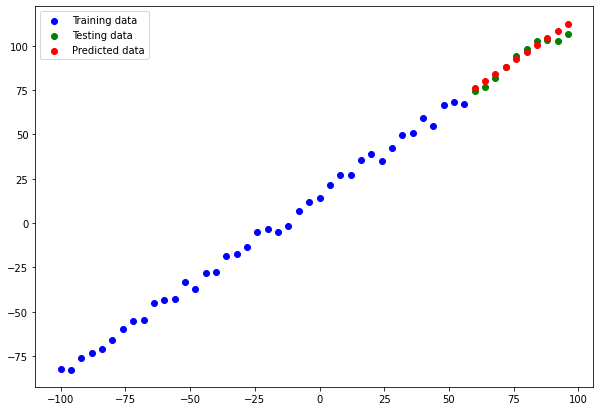

In [20]:
plot_predictions()

## Evaluating model predictions with regression evaluation metrics

In [21]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 76ms/step - loss: 2.7785 - mae: 2.7785


[2.7784743309020996, 2.7784743309020996]

In [22]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=tf.constant(y_pred, shape=(10,)))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=2.7784743>

In [23]:
mse = tf.metrics.mean_squared_error(y_true=y_test, y_pred=tf.constant(y_pred, shape=(10,)))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=11.097374>

In [24]:
# Tensorboard?
# %tensorboard --logdir logs/fit